                                            CAR PRICE PREDICTION

 predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.


# Topic 1 
EDA

# Topic 2 
Data cleaning and Converting Nominal name to number

# Topic 3
 Regression Alogrithm used for prediction

# Topic 4
Score of all Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

### Topic 1

# EDA

___________________________________________________________________________________________________________________________

__________________________________________________________________________________________________________________________

In [2]:
excel=pd.read_excel("Data_Train.xlsx")


In [3]:
excel.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
excel=excel.dropna()

In [5]:
brand=[]

for i in excel.Name :
    words=nltk.word_tokenize(i)
    brand.append(words[0])
    

In [6]:
excel['Brand Name']=brand

In [7]:
excel.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi


In [8]:
m2=[]
for i in excel['Mileage'] :
    words=nltk.word_tokenize(i)
    m2.append(words[0])
#----------Engine---------
E2=[]
for i in excel['Engine'] :
    words=nltk.word_tokenize(i)
    E2.append(words[0])
#---------Power--------
p2=[]
for i in excel['Power'] :
    words=nltk.word_tokenize(i)
    p2.append(words[0])

In [9]:
excel['Mileage']=m2
excel['Engine']=E2
excel['Power']=p2

In [10]:
excel.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74,Audi


In [11]:
fig = plt.gcf()

<Figure size 432x288 with 0 Axes>

### count number of car in Location

Text(0.5, 1.0, 'count of cars based on location')

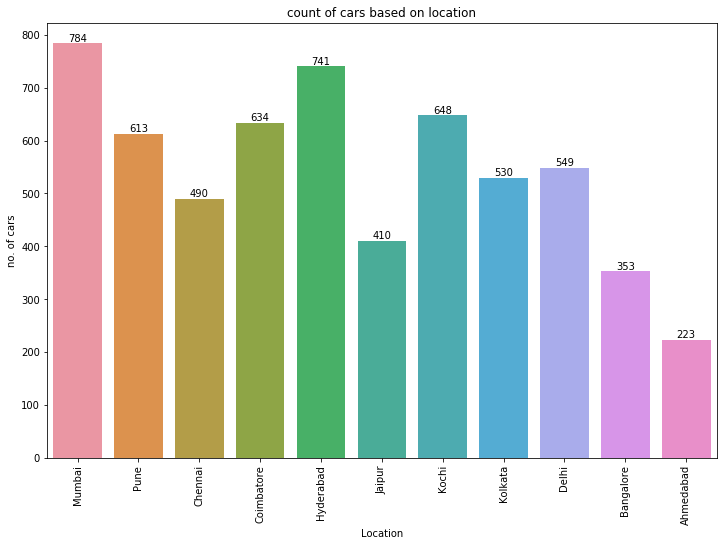

In [12]:
plt.figure(figsize=(12,8))
plot = sns.countplot(excel['Location'])

plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')
plt.xlabel('Location')
plt.ylabel('no. of cars')
plt.title('count of cars based on location')

### count number of car in Brand Name

Text(0, 0.5, 'no. of cars')

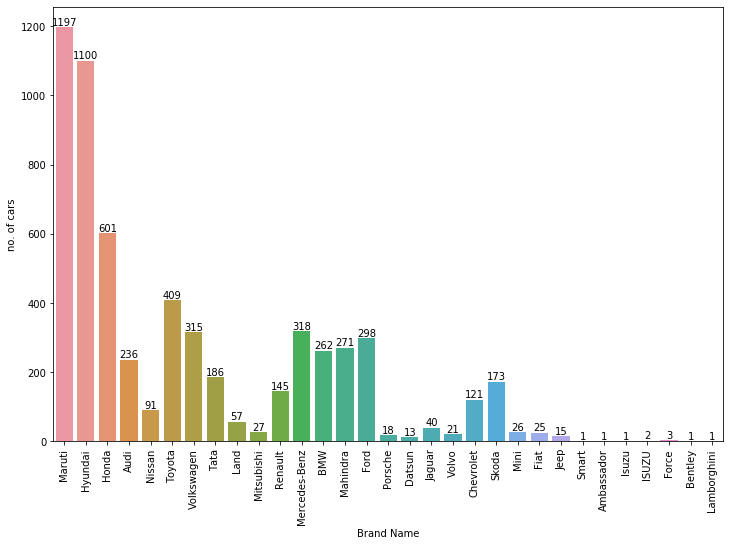

In [13]:
plt.figure(figsize=(12,8))
plot = sns.countplot(excel['Brand Name'])

plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')
plt.xlabel('Brand Name')
plt.ylabel('no. of cars')

### Price vs Brand

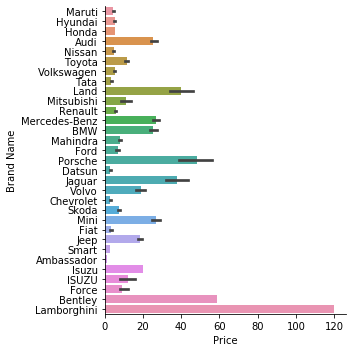

In [14]:
sns.catplot(x="Price",y='Brand Name',kind='bar',data=excel)

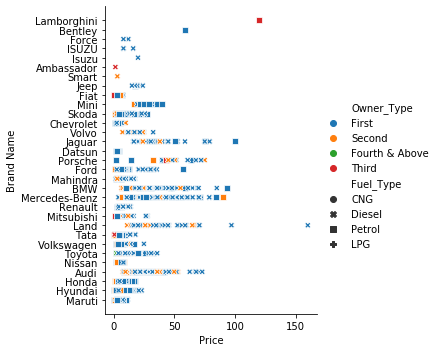

In [15]:
sns.relplot(x="Price",y='Brand Name',data=excel,hue='Owner_Type',style='Fuel_Type')

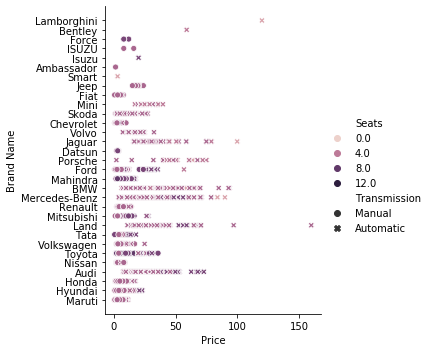

In [16]:
sns.relplot(x="Price",y='Brand Name',data=excel,hue='Seats',style='Transmission')

### Price VS Year

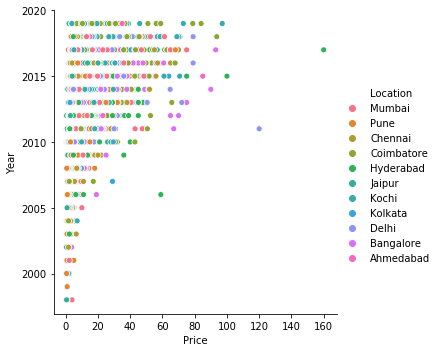

In [17]:
sns.relplot(x="Price",y='Year',data=excel,hue='Location')

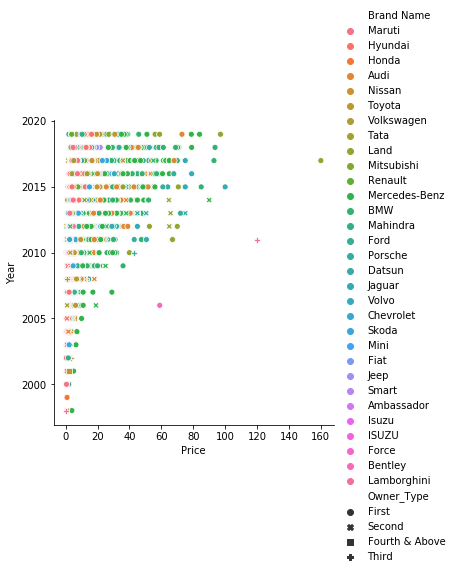

In [18]:
sns.relplot(x="Price",y='Year',data=excel,hue='Brand Name',style='Owner_Type')

### Price vs sheats

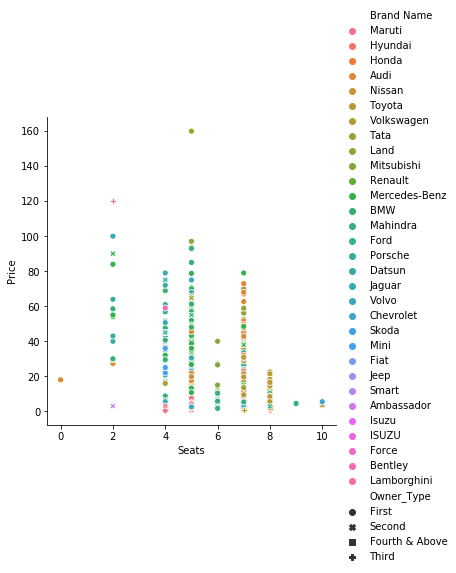

In [19]:
sns.relplot(x='Seats',y='Price',data=excel,hue='Brand Name',style='Owner_Type')

### price vs location

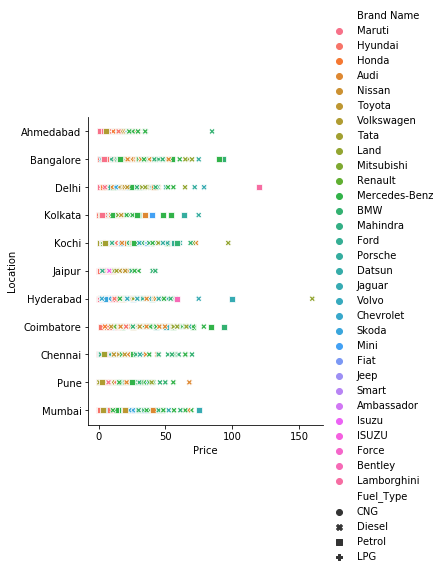

In [20]:
sns.relplot(x='Price',y='Location',data=excel,hue='Brand Name',style='Fuel_Type')

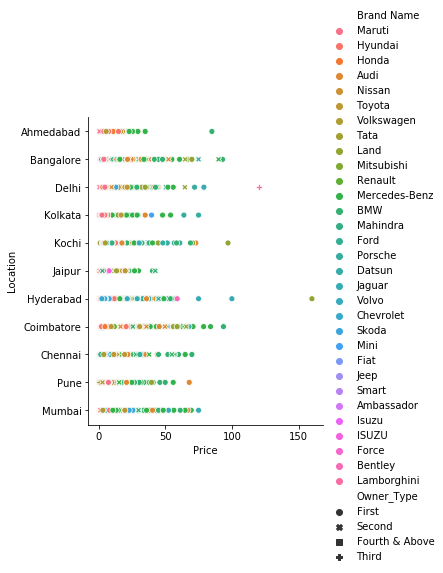

In [21]:
sns.relplot(x='Price',y='Location',data=excel,hue='Brand Name',style='Owner_Type')

### price vs Owner Type

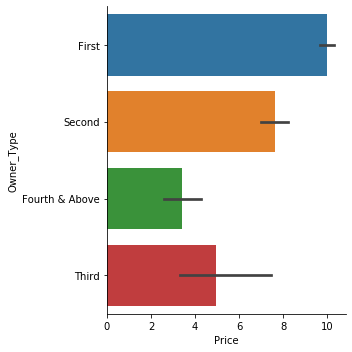

In [22]:
sns.catplot(x='Price',y="Owner_Type",kind='bar',data=excel)

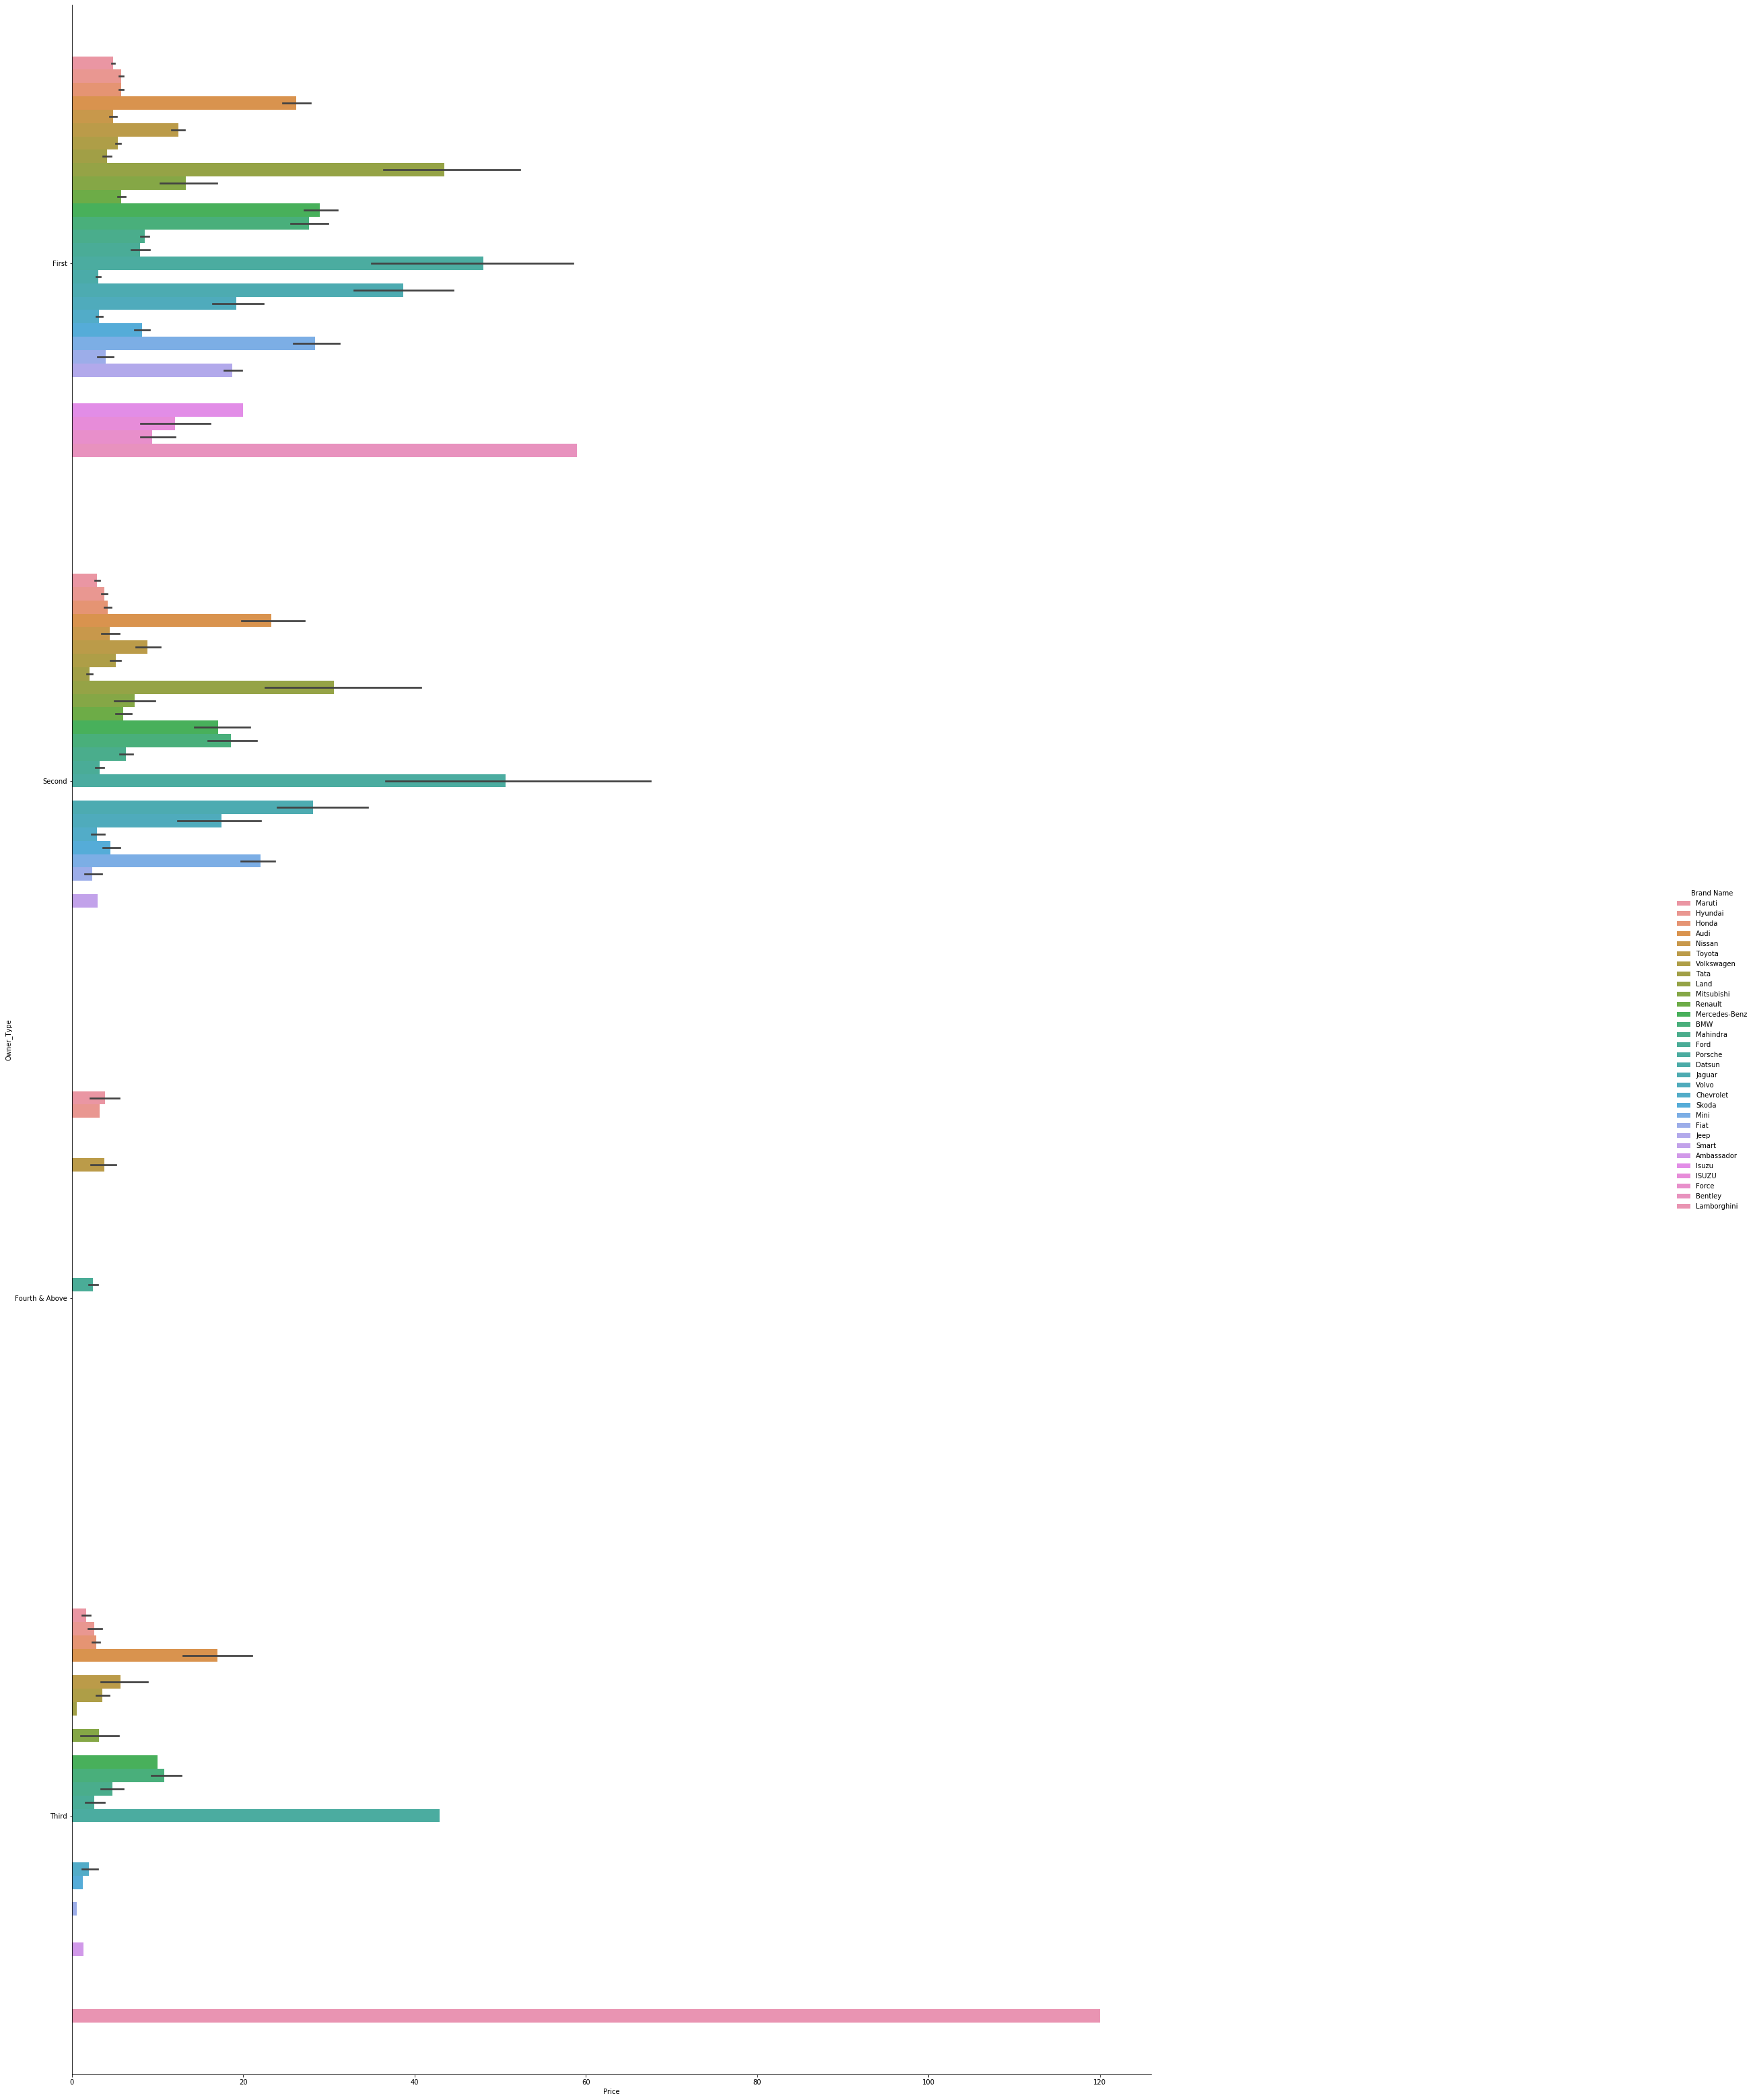

In [23]:
g=sns.catplot(x='Price',y="Owner_Type",kind='bar',data=excel,hue='Brand Name')
g.fig.set_figwidth(50)
g.fig.set_figheight(50)

### Price vs sheats

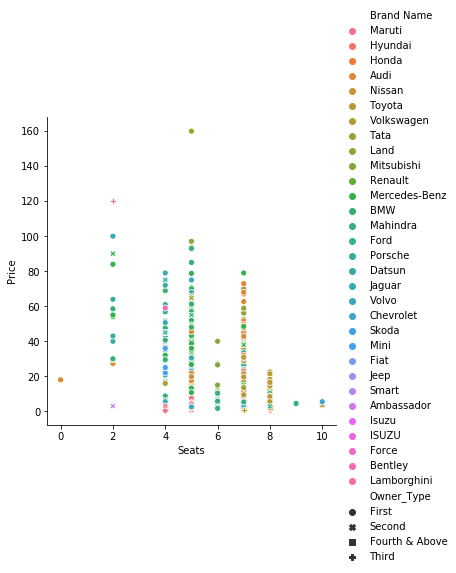

In [24]:
sns.relplot(x='Seats',y='Price',data=excel,hue='Brand Name',style='Owner_Type')

### Engine Vs power

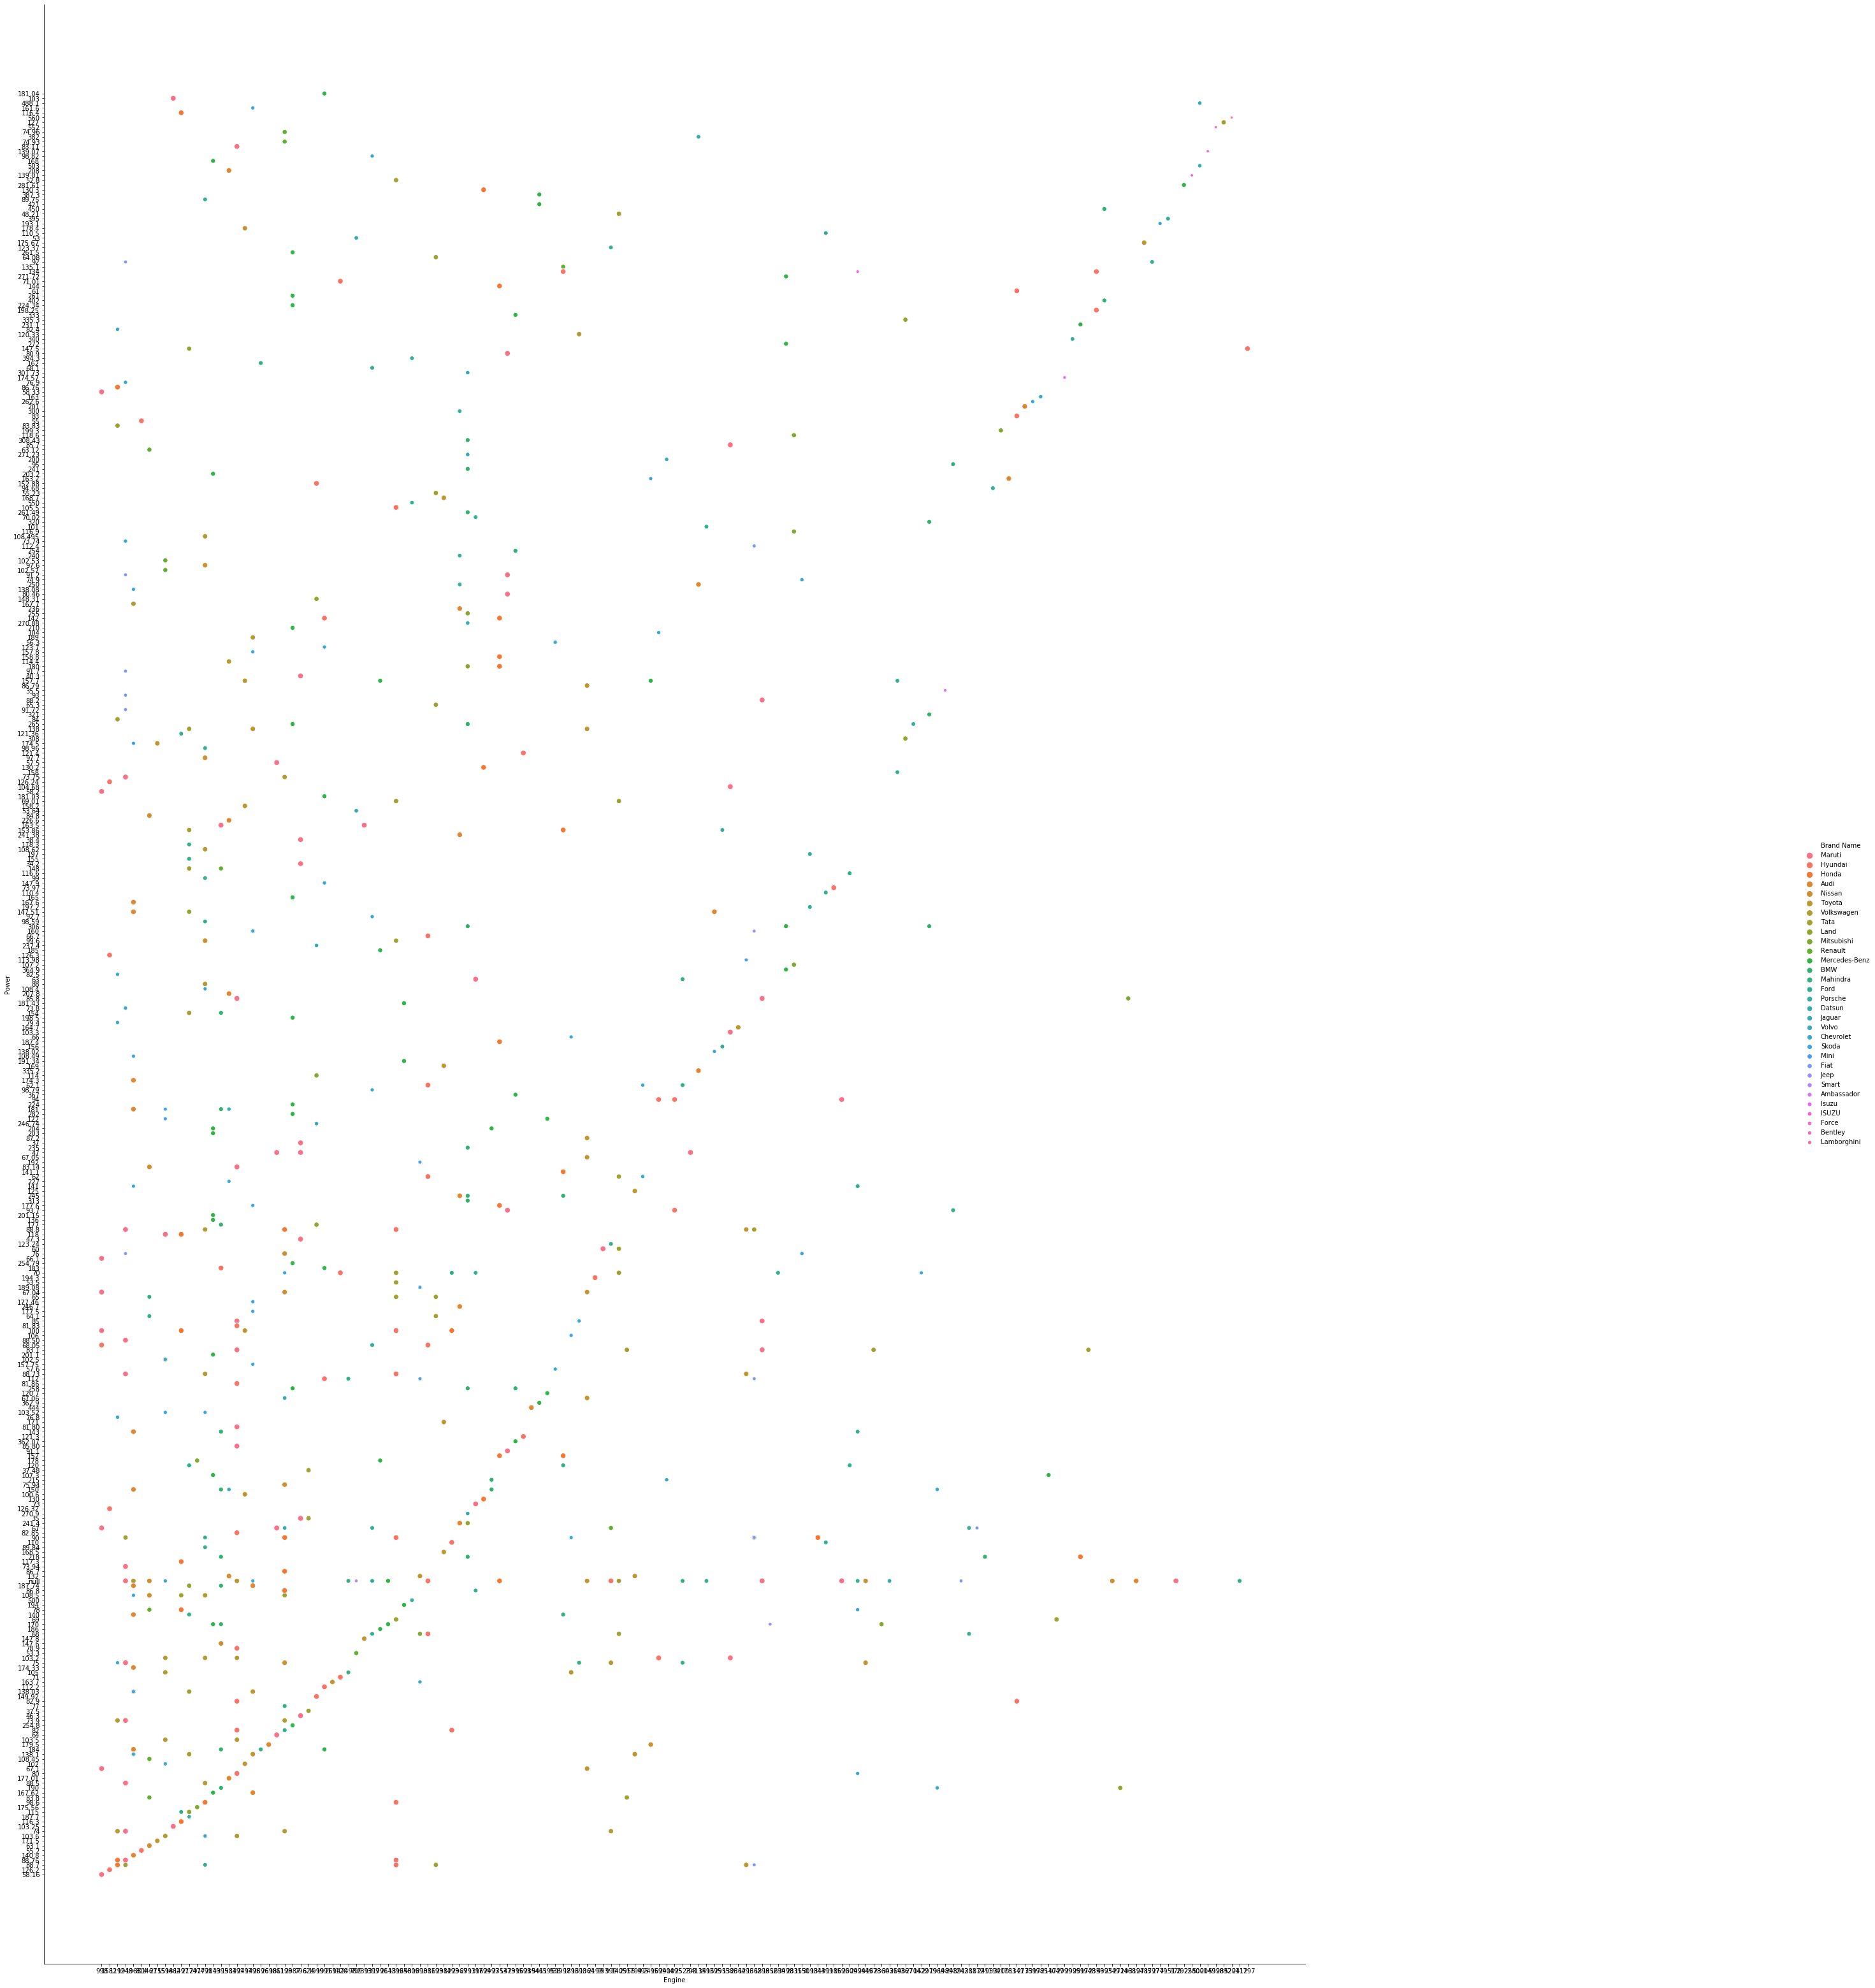

In [25]:
g=sns.relplot(x="Engine",y='Power',data=excel,hue='Brand Name',size='Brand Name')
g.fig.set_figwidth(50)
g.fig.set_figheight(50)

### Engine Vs Price

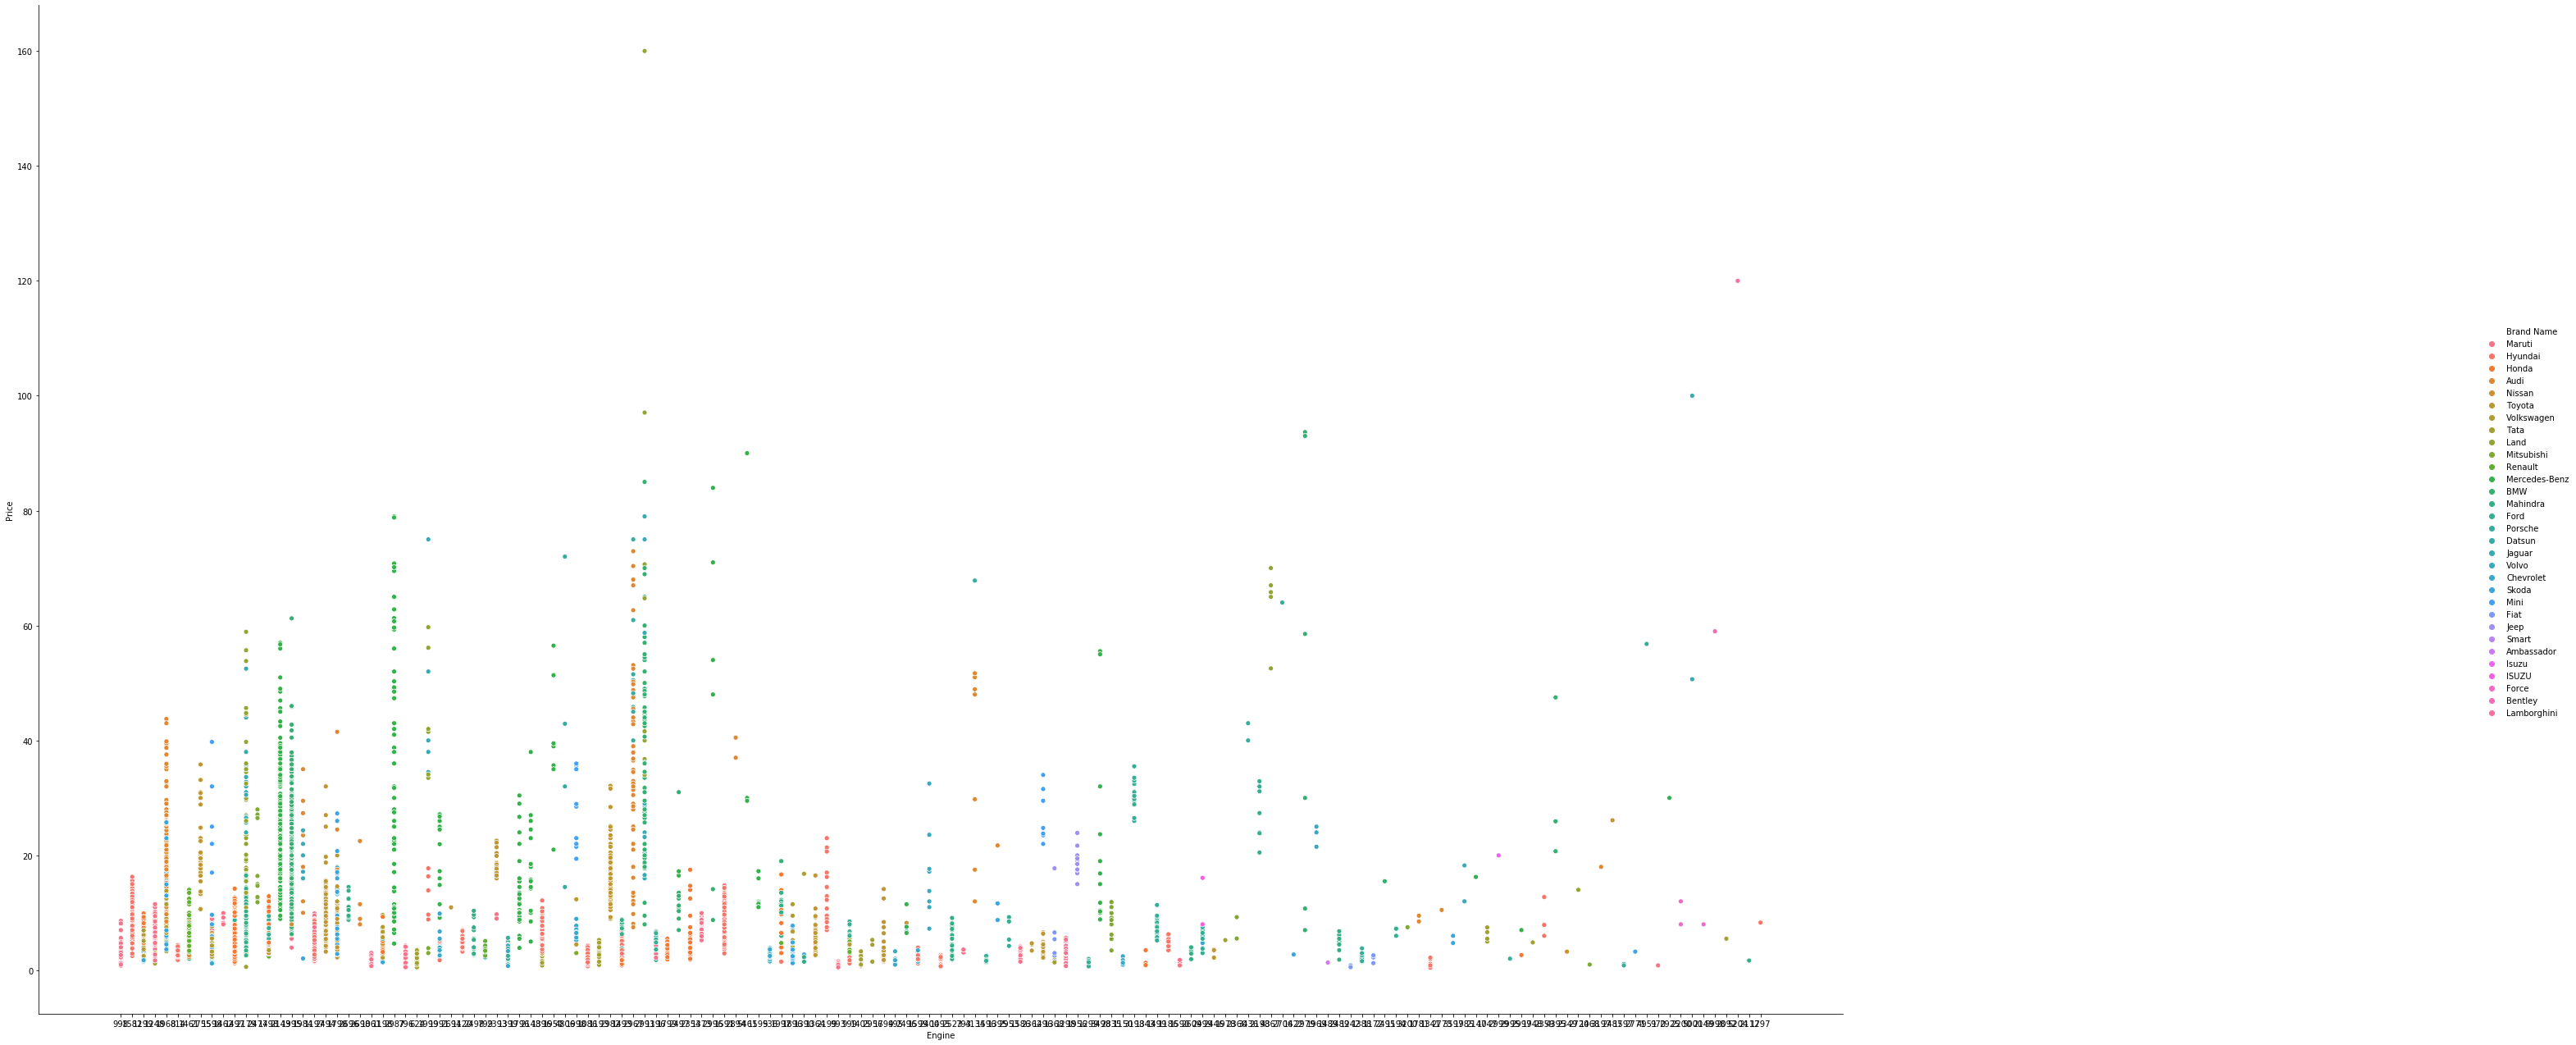

In [26]:
g=sns.relplot(x="Engine",y='Price',data=excel,hue='Brand Name')
g.fig.set_figwidth(50)
g.fig.set_figheight(20)

#### Mileage vs Kilometers Driven

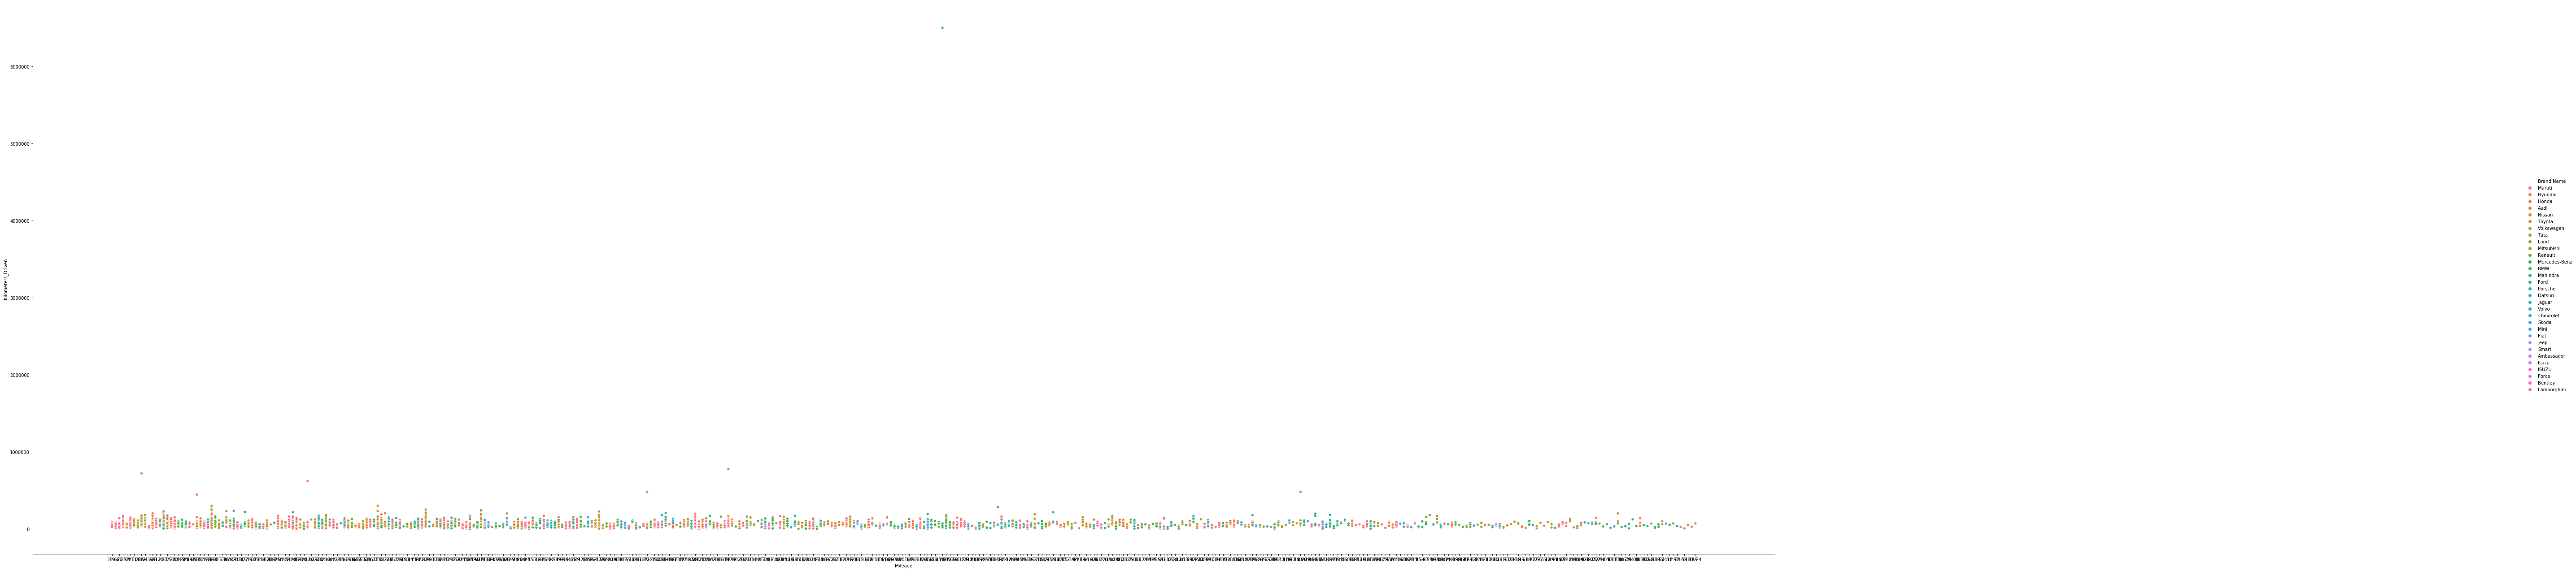

In [27]:
g=sns.relplot(x="Mileage",y='Kilometers_Driven',data=excel,hue='Brand Name')
g.fig.set_figwidth(100)
g.fig.set_figheight(20)

#### Mileage vs Power

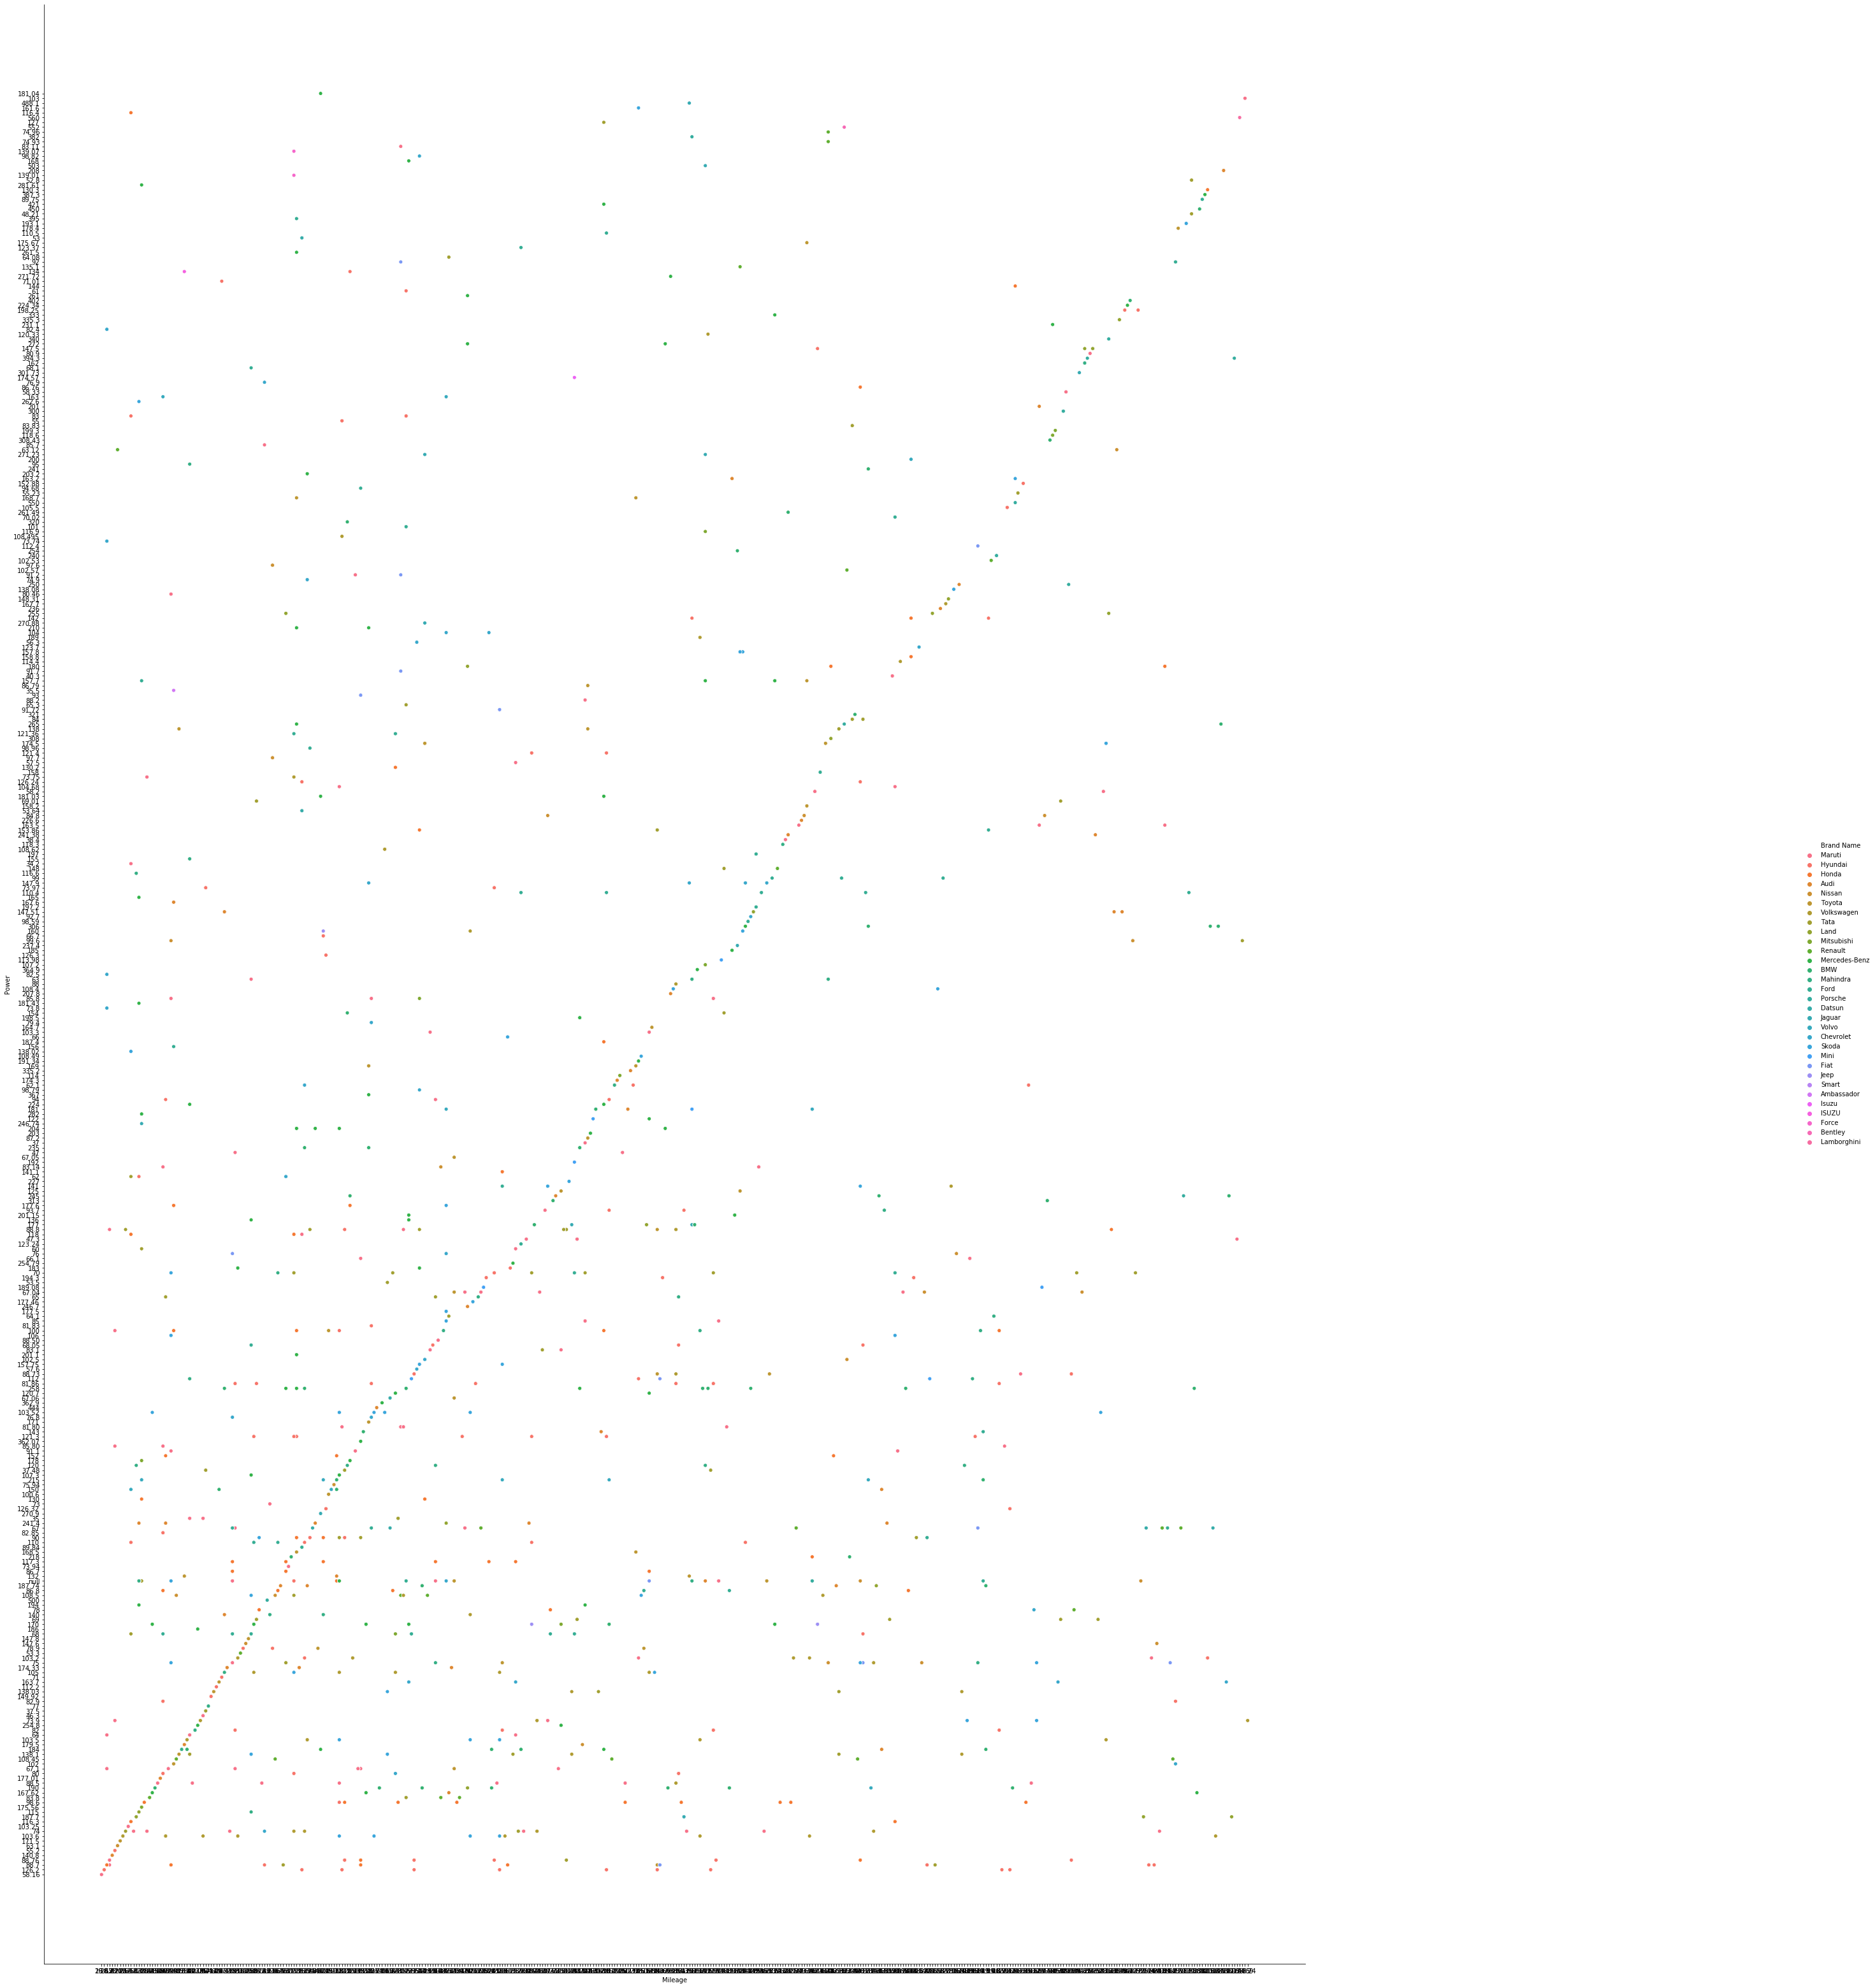

In [28]:
g=sns.relplot(x="Mileage",y='Power',data=excel,hue='Brand Name')
g.fig.set_figwidth(50)
g.fig.set_figheight(50)

#### Mileage vs Price

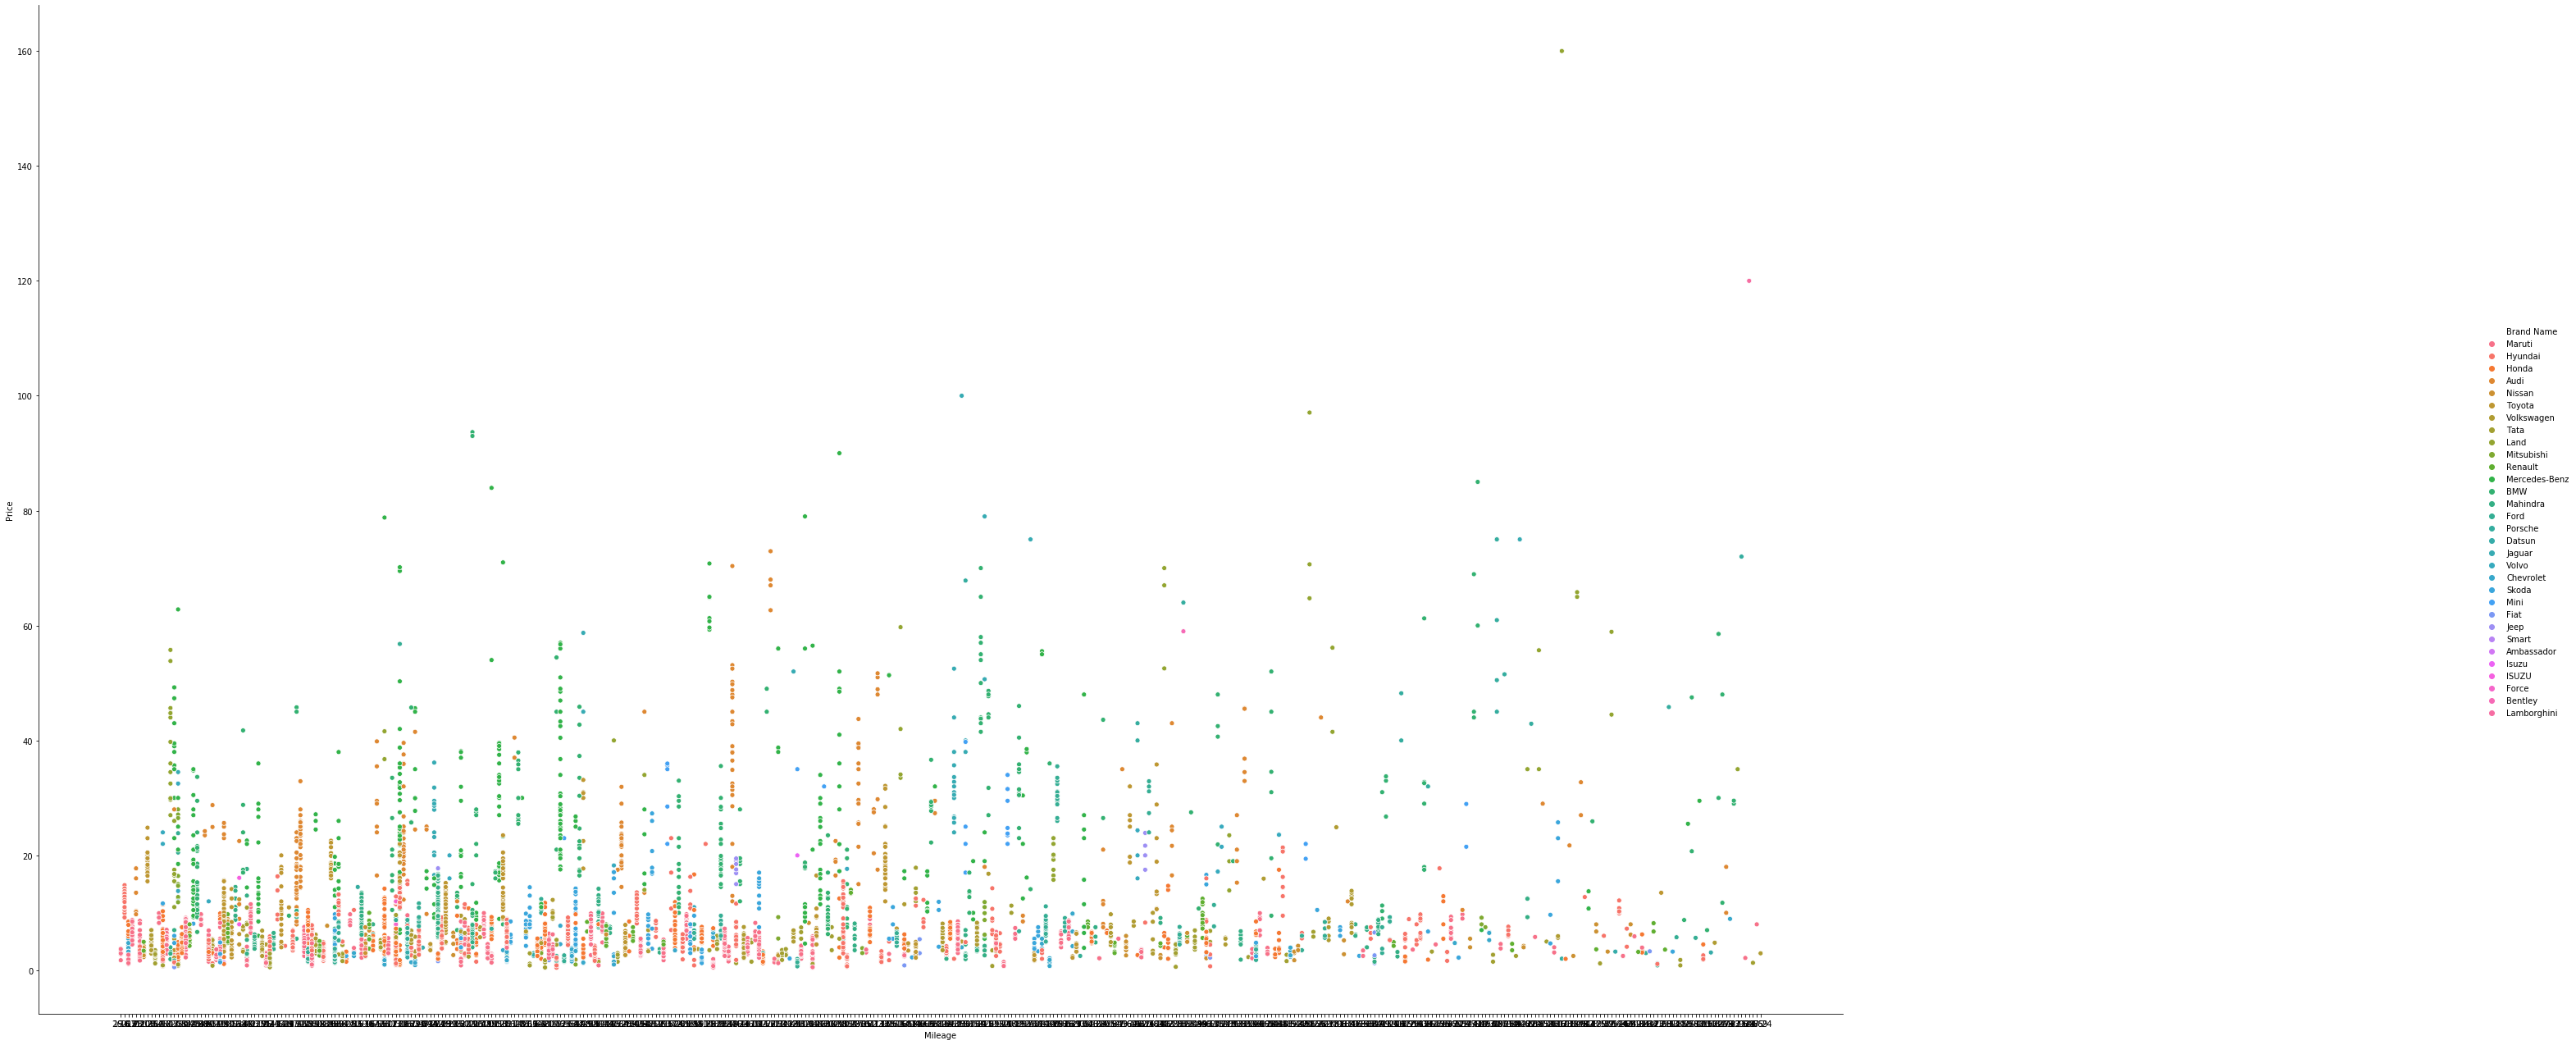

In [29]:
g=sns.relplot(x="Mileage",y='Price',data=excel,hue='Brand Name')
g.fig.set_figwidth(50)
g.fig.set_figheight(20)

#### power vs price

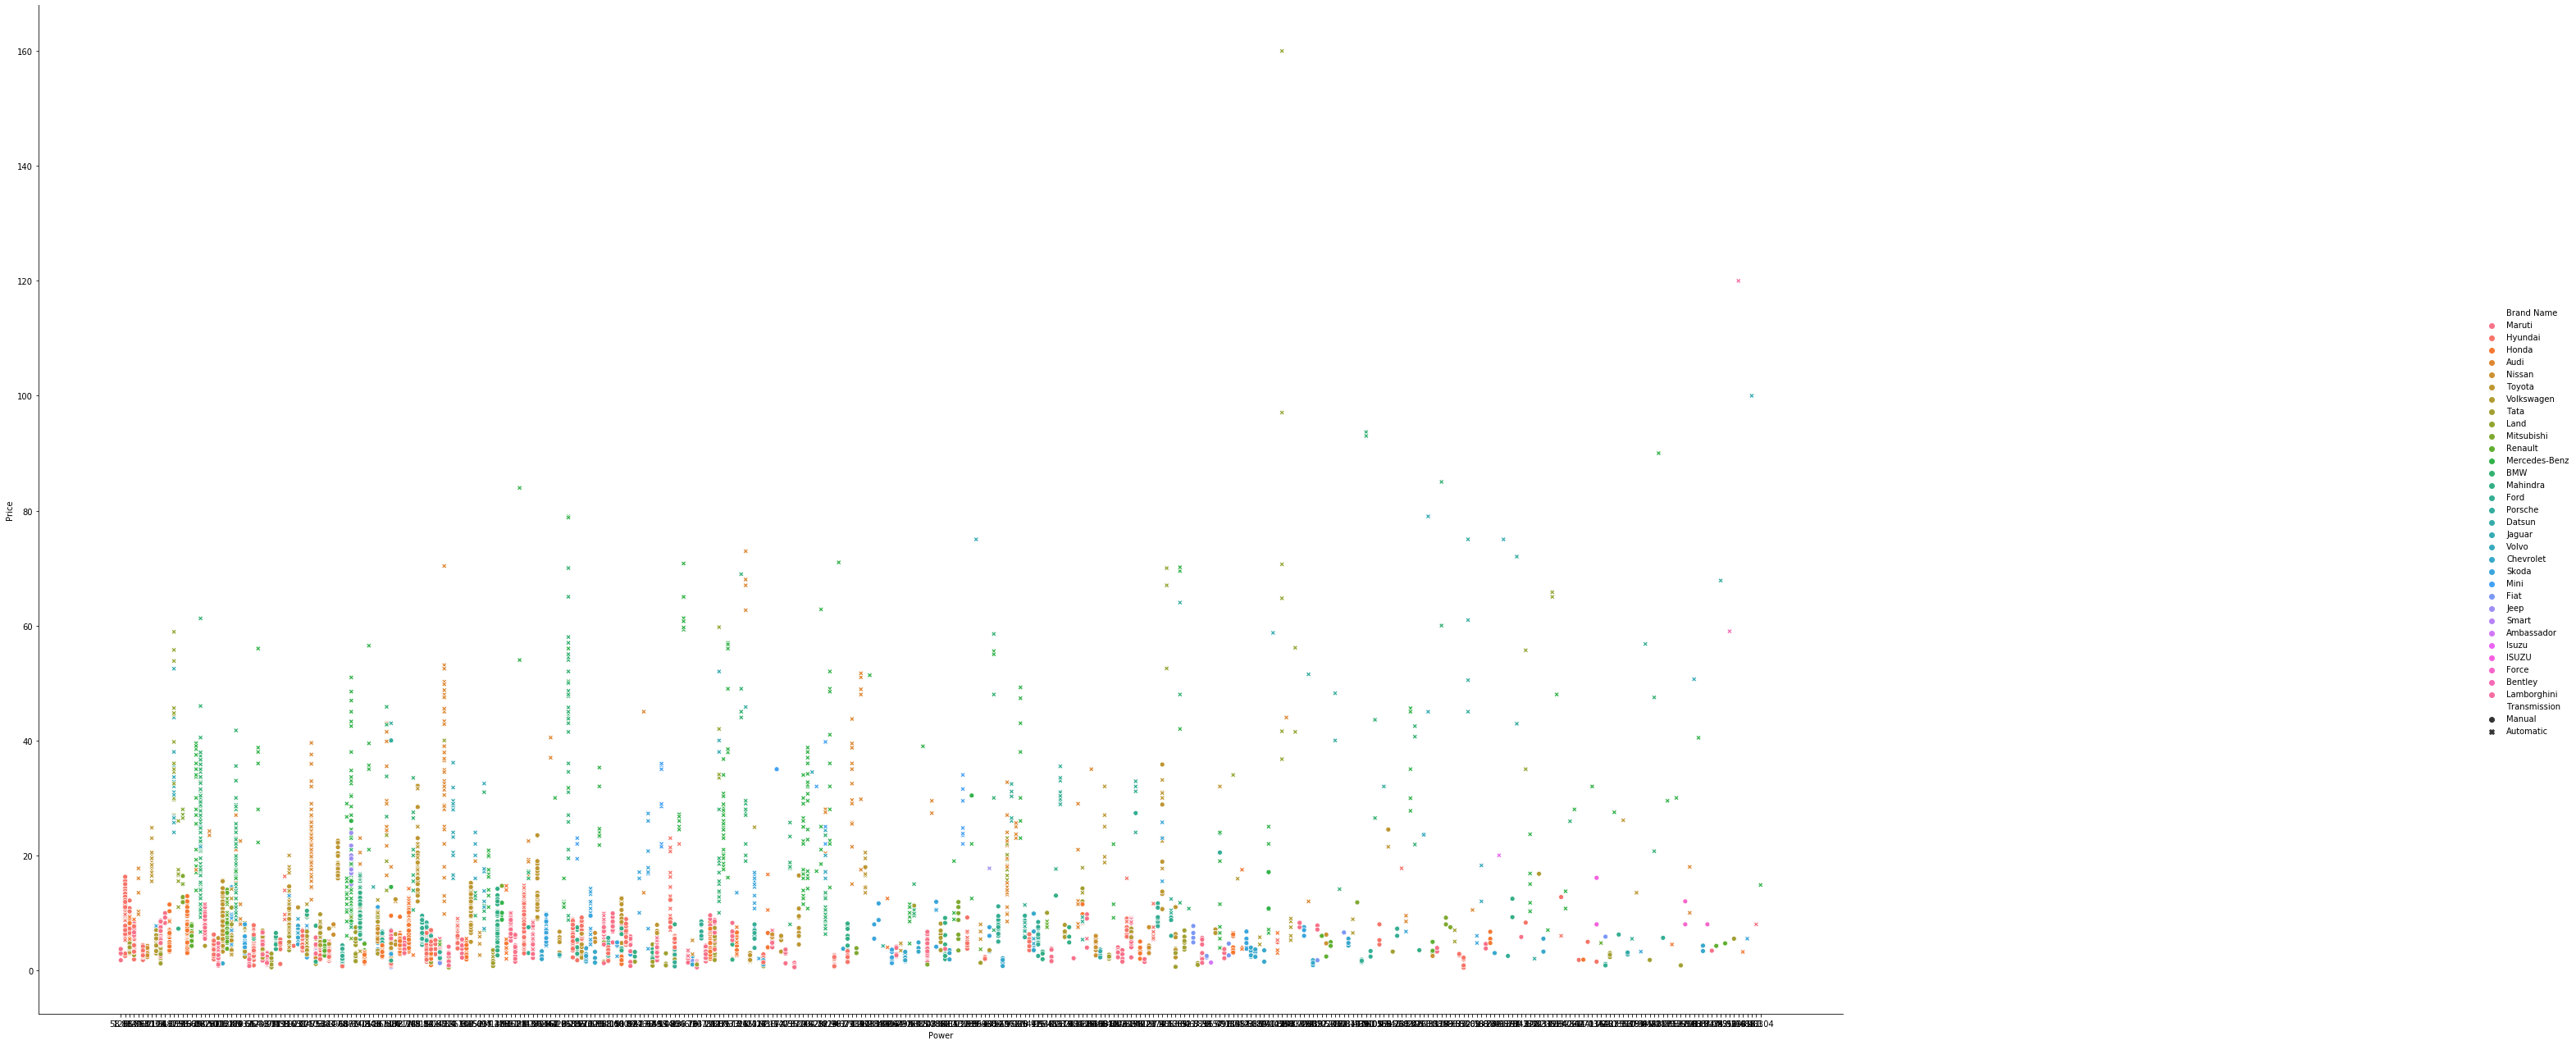

In [30]:
g=sns.relplot(x='Power',y='Price',data=excel,hue='Brand Name',style='Transmission')
g.fig.set_figwidth(50)
g.fig.set_figheight(20)

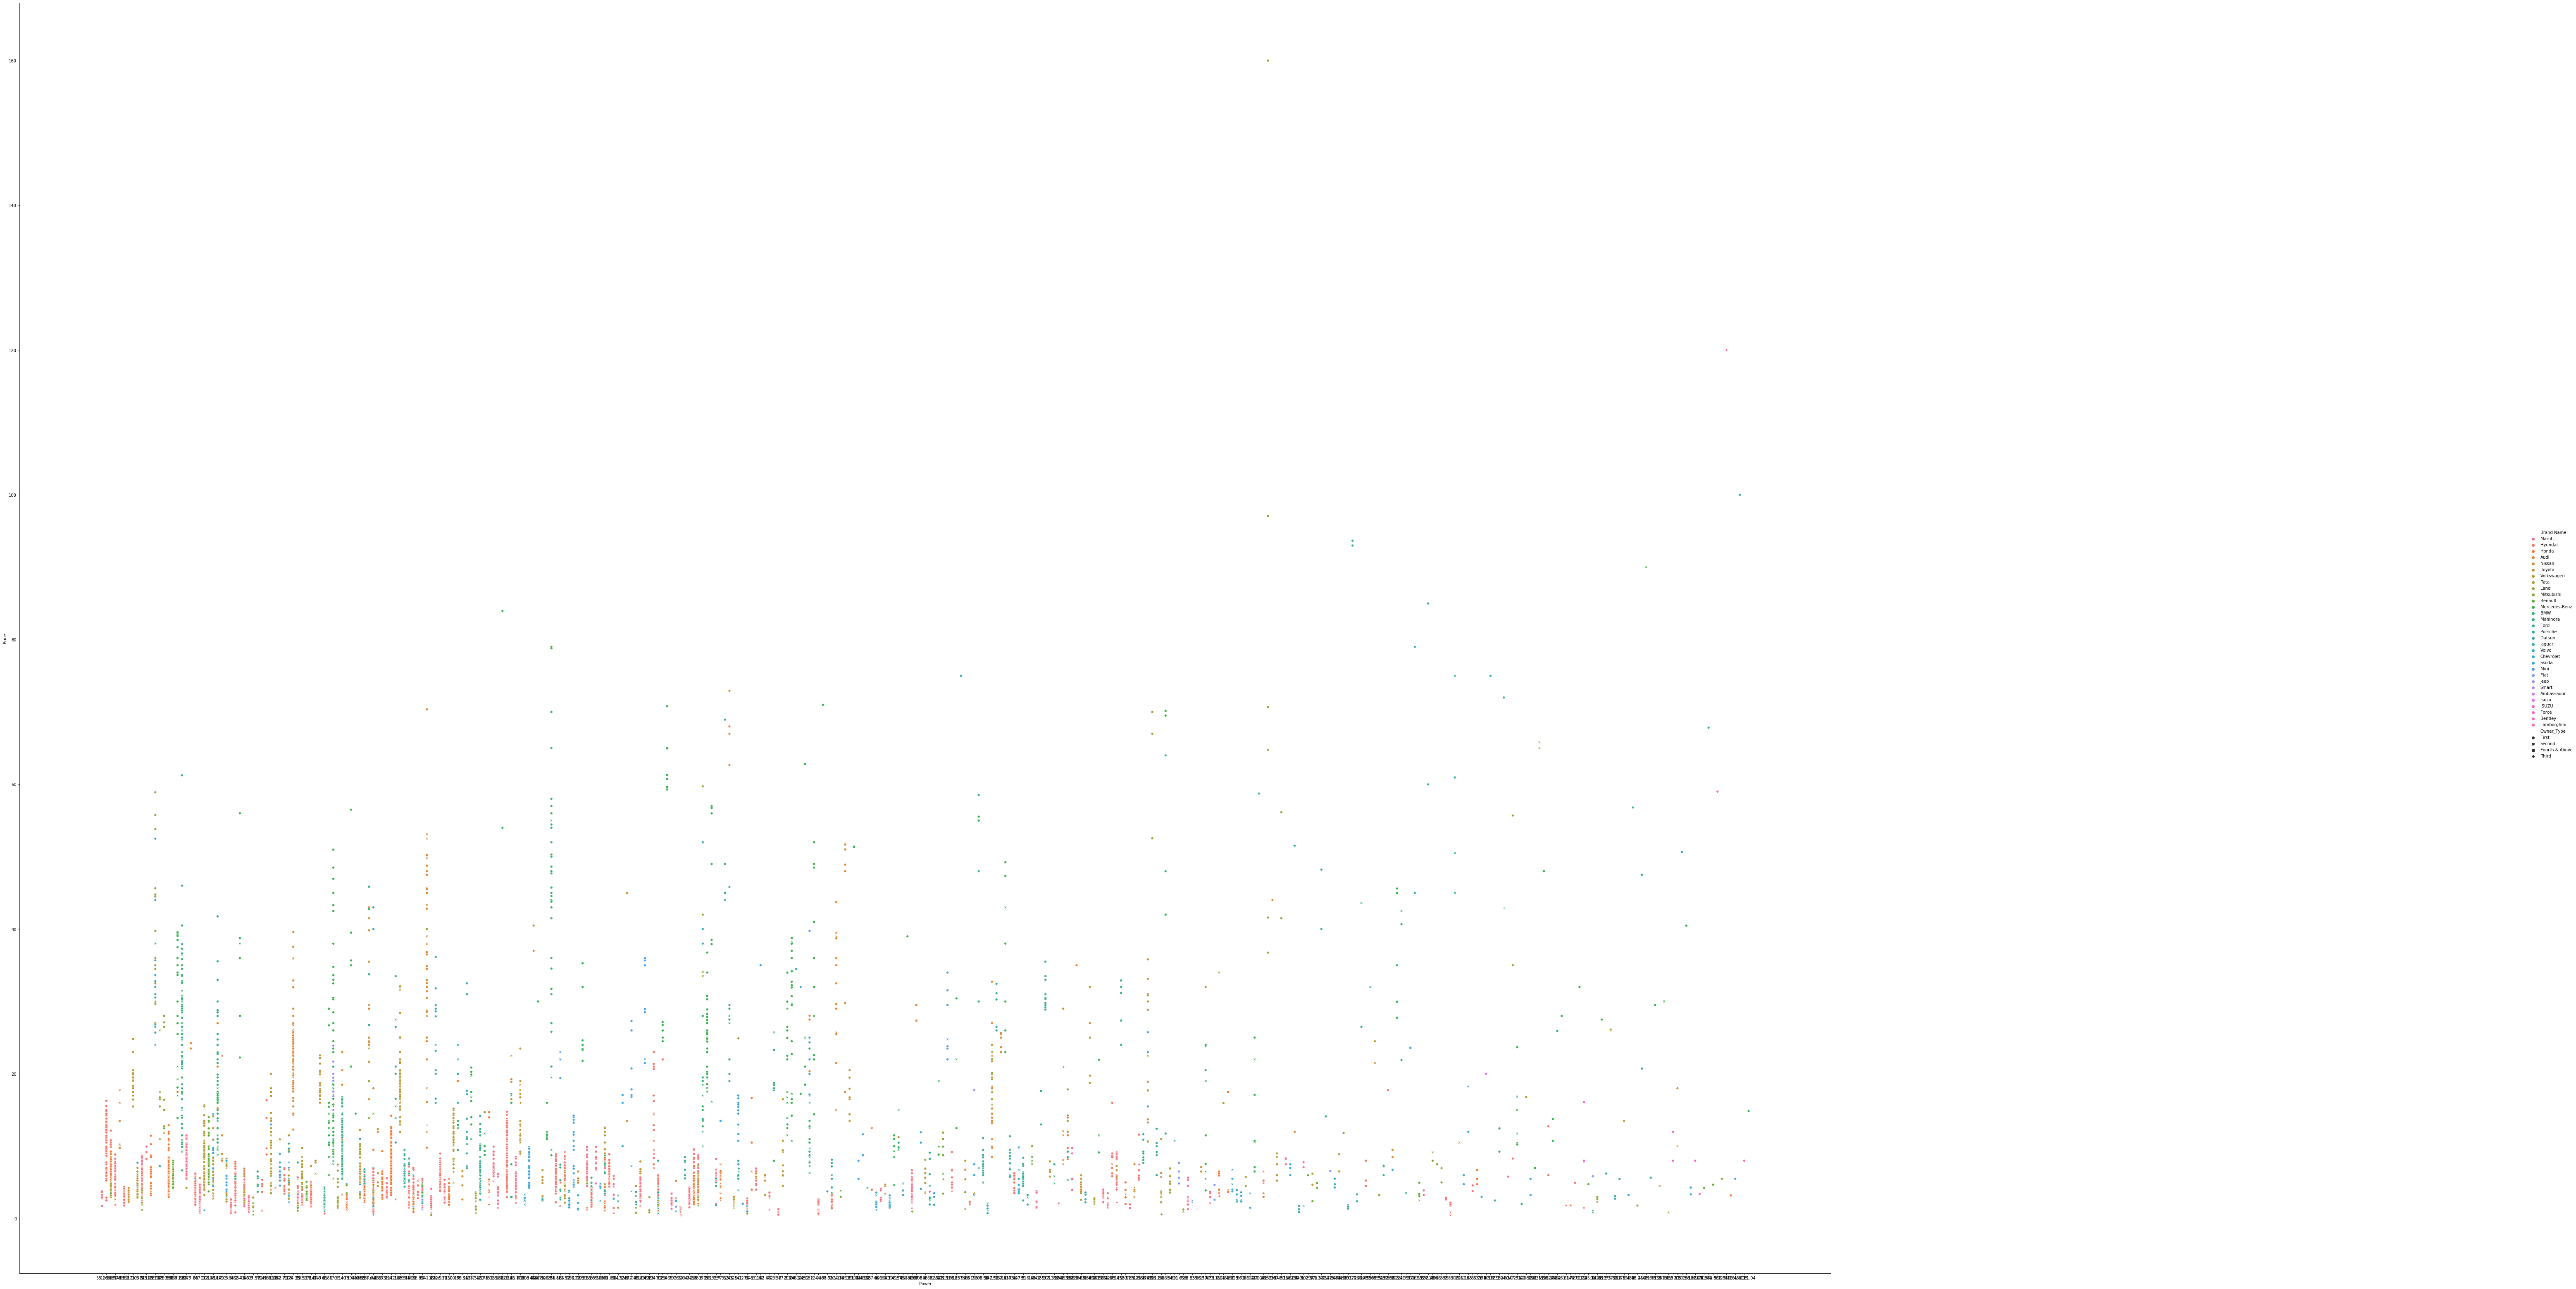

In [31]:
g=sns.relplot(x='Power',y='Price',data=excel,hue='Brand Name',style='Owner_Type')
g.fig.set_figwidth(100)
g.fig.set_figheight(50)

#### Seats vs Brand 

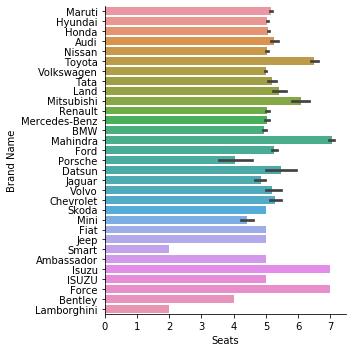

In [32]:
sns.catplot(x='Seats',y="Brand Name",kind='bar',data=excel)

________________________________________________________________________________________________________________________

__________________________________________________________________________________________________________________________

________________________________________________________________________________________________________________________

# Topic 2

# Data cleaning and Converting Nominal name to number



In [33]:
df=pd.read_excel("Data_Train.xlsx")

In [34]:
df2=pd.read_excel("Data_Test.xlsx")

In [35]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [36]:
n1=df.Name

In [37]:
n2=df2.Name

# finding mean 

In [38]:
drop=df.dropna()

In [39]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [40]:
import math 

mm=[]
for i in drop['Mileage'] :
    words=nltk.word_tokenize(i)
    mm.append(words[0])
#----------Engine---------
Ee=[]
for i in drop['Engine'] :
    words=nltk.word_tokenize(i)
    Ee.append(words[0])
#---------Power--------
pp=[]
for i in drop['Power'] :
    words=nltk.word_tokenize(i)
    pp.append(words[0])
    





In [41]:
sum(drop['Power']=='null')

0

In [42]:
drop=drop.drop(drop[drop['Power']=="null"].index)

In [43]:
sum(drop['Power']=='null')

0

In [44]:
drop['Mileage']=mm
drop['Engine']=Ee
drop['Power']=pp

In [45]:
sum(drop['Power']=='null')

103

In [46]:
drop=drop.drop(drop[drop['Power']=="null"].index)

In [47]:
sum(drop['Power']=='null')

0

In [48]:
import math
mm=(drop['Mileage'].median())

In [49]:
mm

18.2

In [50]:
Ee=(drop['Engine'].median())
Ee

1495.5

In [51]:
pp=(drop['Power'].median())
pp

97.7

In [52]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [53]:
df.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50


In [54]:
mm

18.2

In [55]:
mms='18.2 kmpl'
df.Mileage=df['Mileage'].fillna(mms)

In [56]:
Ee

1495.5

In [57]:
Ees='1495.5 CC'
df.Engine=df['Engine'].fillna(Ees)

In [58]:
pp

97.7

In [59]:
pps='97.7 bhp'
df.Power=df['Power'].fillna(pps)

In [60]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Seats                42
Price                 0
dtype: int64

In [61]:
ss=math.floor(df.Seats.median())

In [62]:
ss

5

In [63]:
df.Seats=df['Seats'].fillna(pp)

In [64]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [65]:
drop2=df2.dropna()

In [66]:
import math 

mm2=[]
for i in drop2['Mileage'] :
    words=nltk.word_tokenize(i)
    mm2.append(words[0])
#----------Engine---------
Ee2=[]
for i in drop2['Engine'] :
    words=nltk.word_tokenize(i)
    Ee2.append(words[0])
#---------Power--------
pp2=[]
for i in drop2['Power'] :
    words=nltk.word_tokenize(i)
    pp2.append(words[0])
    

In [67]:
drop2['Mileage']=mm2
drop2['Engine']=Ee2
drop2['Power']=pp2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [68]:
drop2=drop2.drop(drop2[drop2['Power']=="null"].index)

In [69]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [70]:
mma2=(drop2['Mileage'].median())
Eea2=(drop2['Engine'].median())
ppa2=(drop2['Power'].median())
ssa2=math.floor(df2.Seats.median())

In [71]:
ppa2

93.7

In [72]:
mmas='18.48 kmpl'

In [73]:
mmas='18.48 kmpl'
Eeas='1461.0 CC'
ppas='93.7 bhp'
df2.Mileage=df['Mileage'].fillna(mmas)
df2.Engine=df['Engine'].fillna(Eeas)
df2.Power=df['Power'].fillna(ppas)
df2.Seats=df['Seats'].fillna(ppas)

In [74]:
df2.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [75]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [76]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

## converting Nominal name to number

In [77]:
df['Location']=LE.fit_transform(df['Location'])
df['Fuel_Type']=LE.fit_transform(df['Fuel_Type'])
df['Transmission']=LE.fit_transform(df['Transmission'])
df['Owner_Type']=LE.fit_transform(df['Owner_Type'])

In [78]:
df2['Location']=LE.fit_transform(df2['Location'])
df2['Fuel_Type']=LE.fit_transform(df2['Fuel_Type'])
df2['Transmission']=LE.fit_transform(df2['Transmission'])
df2['Owner_Type']=LE.fit_transform(df2['Owner_Type'])

In [79]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,9,2010,72000,0,1,0,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,10,2015,41000,1,1,0,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,2,2011,46000,4,1,0,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,2,2012,87000,1,1,0,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,3,2013,40670,1,0,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [80]:
name_final2=pd.Series.tolist(df2.Name)
df2.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,4,2014,40929,0,1,0,26.6 km/kg,998 CC,58.16 bhp,5.0
1,Maruti Alto 800 2016-2019 LXI,3,2013,54493,3,1,2,19.67 kmpl,1582 CC,126.2 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,9,2017,34000,1,1,0,18.2 kmpl,1199 CC,88.7 bhp,5.0
3,Toyota Etios Liva GD,5,2012,139000,1,1,0,20.77 kmpl,1248 CC,88.76 bhp,7.0
4,Hyundai i20 Magna,9,2014,29000,3,1,0,15.2 kmpl,1968 CC,140.8 bhp,5.0


## Spliting Model name and Brand Name

In [81]:
import nltk

In [82]:
brand=[]
model=[]
s=""
for i in df.Name :
    words=nltk.word_tokenize(i)
    brand.append(words[0])
    s=(words[1:])
    model.append(s)
    

In [83]:
df['Brand Name']=brand

In [84]:
df['Model Name']=model

In [85]:
columns_names=['Brand Name', 'Model Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type','Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','Price']

In [86]:
df=df.reindex(columns=columns_names)

In [87]:
df.head()

,Brand Name,Model Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,"[Wagon, R, LXI, CNG]",9,2010,72000,0,1,0,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,"[Creta, 1.6, CRDi, SX, Option]",10,2015,41000,1,1,0,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,"[Jazz, V]",2,2011,46000,4,1,0,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,"[Ertiga, VDI]",2,2012,87000,1,1,0,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,"[A4, New, 2.0, TDI, Multitronic]",3,2013,40670,1,0,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [88]:
brand2=[]
model2=[]

for i in df2.Name :
    words=nltk.word_tokenize(i)
    brand2.append(words[0])
    model2.append((words[1:]))
    

In [89]:
df2['Brand Name']=brand2
df2['Model Name']=model2
columns_names=['Brand Name', 'Model Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type','Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']
df2=df2.reindex(columns=columns_names)
df2.head()

,Brand Name,Model Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti,"[Alto, K10, LXI, CNG]",4,2014,40929,0,1,0,26.6 km/kg,998 CC,58.16 bhp,5.0
1,Maruti,"[Alto, 800, 2016-2019, LXI]",3,2013,54493,3,1,2,19.67 kmpl,1582 CC,126.2 bhp,5.0
2,Toyota,"[Innova, Crysta, Touring, Sport, 2.4, MT]",9,2017,34000,1,1,0,18.2 kmpl,1199 CC,88.7 bhp,5.0
3,Toyota,"[Etios, Liva, GD]",5,2012,139000,1,1,0,20.77 kmpl,1248 CC,88.76 bhp,7.0
4,Hyundai,"[i20, Magna]",9,2014,29000,3,1,0,15.2 kmpl,1968 CC,140.8 bhp,5.0


## To conver name to number

In [90]:
df['Brand Name']=LE.fit_transform(df['Brand Name'])
df['Model Name']=n1
df['Model Name']=LE.fit_transform(df['Model Name'])

In [91]:
df.head()

,Brand Name,Model Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,18,1200,9,2010,72000,0,1,0,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,10,512,10,2015,41000,1,1,0,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,9,486,2,2011,46000,4,1,0,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,18,1059,2,2012,87000,1,1,0,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,1,23,3,2013,40670,1,0,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [92]:
df2['Brand Name']=LE.fit_transform(df2['Brand Name'])
df2['Model Name']=n2
df2['Model Name']=LE.fit_transform(df2['Model Name'])

In [93]:
df2

,Brand Name,Model Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,16,413,4,2014,40929,0,1,0,26.6 km/kg,998 CC,58.16 bhp,5.0
1,16,408,3,2013,54493,3,1,2,19.67 kmpl,1582 CC,126.2 bhp,5.0
2,26,723,9,2017,34000,1,1,0,18.2 kmpl,1199 CC,88.7 bhp,5.0
3,26,689,5,2012,139000,1,1,0,20.77 kmpl,1248 CC,88.76 bhp,7.0
4,9,333,9,2014,29000,3,1,0,15.2 kmpl,1968 CC,140.8 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,27,758,5,2011,89411,1,1,0,18.6 kmpl,1199 CC,79.4 bhp,5.0
1230,27,745,9,2015,59000,3,0,0,21.43 kmpl,1364 CC,86.79 bhp,5.0
1231,20,582,8,2012,28000,1,1,0,16.0 kmpl,2179 CC,140 bhp,7.0
1232,27,745,10,2013,52262,3,0,3,24.4 kmpl,1120 CC,71 bhp,5.0


## Claening is SI units 

In [94]:
m=[]
for i in df['Mileage'] :
    words=nltk.word_tokenize(i)
    m.append(words[0])
#----------Engine---------
E=[]
for i in df['Engine'] :
    words=nltk.word_tokenize(i)
    E.append(words[0])
#---------Power--------
p=[]
for i in df['Power'] :
    words=nltk.word_tokenize(i)
    p.append(words[0])



In [95]:
df['Mileage']=m
df['Engine']=E
df['Power']=p

In [96]:
df.head()

,Brand Name,Model Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,18,1200,9,2010,72000,0,1,0,26.6,998,58.16,5.0,1.75
1,10,512,10,2015,41000,1,1,0,19.67,1582,126.2,5.0,12.50
2,9,486,2,2011,46000,4,1,0,18.2,1199,88.7,5.0,4.50
3,18,1059,2,2012,87000,1,1,0,20.77,1248,88.76,7.0,6.00
4,1,23,3,2013,40670,1,0,2,15.2,1968,140.8,5.0,17.74


In [97]:
m2=[]
for i in df2['Mileage'] :
    words=nltk.word_tokenize(i)
    m2.append(words[0])
#----------Engine---------
E2=[]
for i in df2['Engine'] :
    words=nltk.word_tokenize(i)
    E2.append(words[0])
#---------Power--------
p2=[]
for i in df2['Power'] :
    words=nltk.word_tokenize(i)
    p2.append(words[0])

In [98]:
df2['Mileage']=m2

In [99]:
df2['Engine']=E2

In [100]:
df2['Power']=p2

In [101]:
df2.head()

,Brand Name,Model Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,16,413,4,2014,40929,0,1,0,26.6,998,58.16,5.0
1,16,408,3,2013,54493,3,1,2,19.67,1582,126.2,5.0
2,26,723,9,2017,34000,1,1,0,18.2,1199,88.7,5.0
3,26,689,5,2012,139000,1,1,0,20.77,1248,88.76,7.0
4,9,333,9,2014,29000,3,1,0,15.2,1968,140.8,5.0


In [102]:
df2=df2.drop(df2[df2['Power']=="null"].index)

In [103]:
df2.head()

,Brand Name,Model Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,16,413,4,2014,40929,0,1,0,26.6,998,58.16,5.0
1,16,408,3,2013,54493,3,1,2,19.67,1582,126.2,5.0
2,26,723,9,2017,34000,1,1,0,18.2,1199,88.7,5.0
3,26,689,5,2012,139000,1,1,0,20.77,1248,88.76,7.0
4,9,333,9,2014,29000,3,1,0,15.2,1968,140.8,5.0


In [104]:
sum(df['Power']=='null')

107

In [105]:
df=df.drop(df[df['Power']=="null"].index)

In [106]:
sum(df['Power']=='null')

0

In [107]:
df2=df2.drop(df2[df2['Power']=="null"].index)

___________________________________________________________________________

_______________________________________________________________________________

______________________________________________________________________________

# Topic 3

# Regression Alogrithm used for prediction

In [108]:
train=df

In [109]:
test=df2

In [110]:
x=train.drop(['Price'],axis=1)
y=train.Price

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## Linear Regression

In [113]:
from sklearn import linear_model

In [114]:
reg=linear_model.LinearRegression()

In [115]:
reg.fit(train[['Brand Name', 'Model Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats']],train['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
reg.predict(test[['Brand Name', 'Model Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats']])

array([-1.30408819,  5.40648944,  2.53217419, ...,  6.50231399,
       -4.33744829, 21.79722063])

In [117]:
Input2=train[['Brand Name', 'Model Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats']]

In [118]:
target2=train['Price']

In [119]:
S0=reg.score(x_test,y_test)

In [120]:
S0

0.7358437503096049

# ----------------------------------------------------------------------------------------------------------

## RIDGE REGRESSION

In [121]:
from sklearn.linear_model import Ridge

In [122]:
RR=Ridge(alpha=1.0)

In [123]:
RR.fit(train[['Brand Name', 'Model Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats']],train['Price'])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [124]:
RR.predict(test[['Brand Name', 'Model Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats']])

array([-1.30448311,  5.40795149,  2.53284125, ...,  6.50367234,
       -4.34158027, 21.79648489])

In [125]:
Input2=train[['Brand Name', 'Model Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats']]

In [126]:
target2=train['Price']

In [127]:
S1=RR.score(x_test,y_test)

In [128]:
S1

0.7358496125456573

# -----------------------------------------------------------------------------------------------------------

## LASSO REGRESSION

In [129]:
from sklearn.linear_model import Lasso

In [130]:
LR=Lasso(alpha=1.0)

In [131]:
LR.fit(train[['Brand Name', 'Model Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats']],train['Price'])

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [132]:
LR.predict(test[['Brand Name', 'Model Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats']])

array([ 1.40150532, 11.37452336,  8.40479207, ..., 12.39093024,
        1.8105472 , 24.18932581])

In [133]:
Input2=train[['Brand Name', 'Model Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats']]

In [134]:
target2=train['Price']

In [135]:
S2=LR.score(x_test,y_test)

In [136]:
S2

0.722024220782971

# -----------------------------------------------------------------------------------------------------------

# xgboost

In [137]:
import xgboost as xgb

In [138]:
xgb=xgb.XGBRegressor(n_estimators =400,learning_rate=12,max_depth=24)

In [139]:
reg.fit(train[['Brand Name', 'Model Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats']],train['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [140]:
reg.predict(test[['Brand Name', 'Model Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats']])

array([-1.30408819,  5.40648944,  2.53217419, ...,  6.50231399,
       -4.33744829, 21.79722063])

In [141]:
S3=reg.score(x_test,y_test)

In [142]:
S3

0.7358437503096049

### TOPIC 4

# SCORE OF ALL REGRESSION

In [143]:
print("LINEAR REGRESSION     --> ",S0)
print("RIDGE  REGRESSION     --> ",S1)
print("LASSO  REGRESSION     --> ",S2)
print("XGBOOST XGBREGRESSOR  --> ",S3)

LINEAR REGRESSION     -->  0.7358437503096049
RIDGE  REGRESSION     -->  0.7358496125456573
LASSO  REGRESSION     -->  0.722024220782971
XGBOOST XGBREGRESSOR  -->  0.7358437503096049


In [144]:
LIST=[S0,S1,S2,S3]

In [145]:
max(LIST)

0.7358496125456573

In [146]:
dic={'LINEAR REGRESSION':S0,'RIDGE  REGRESSION':S1,'LASSO  REGRESSION':S2,'XGBOOST XGBREGRESSOR':S3}

In [147]:
max_key = max(dic, key=dic.get)

In [148]:
all_values = dic.values()
max_value = max(all_values)

In [149]:
print(max_key)

RIDGE  REGRESSION


In [150]:
print(max_key," : ",max_value)

RIDGE  REGRESSION  :  0.7358496125456573
